<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Me_Ex_Ec_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método explícito para la ecuación de onda**

Resolver:

$ \frac{\partial^2 u(x,t)}{\partial t^2} -4\frac{\partial^2 u(x,t)}{\partial x^2}$=0, $0<x<1$, $t>0$

Sujeto a las restricciones:

$u(0,t)=u(1,t)=0$, $0<t$, $u(x,0)=sen(\pi x)$, $0\leq x \leq 1$ y $\frac{\partial u(x,0)}{\partial t}=0$.

Usando $h=0.1$ $k=0.05$. Compare con la solución exacta $u(x,t)=sen(\pi x)cos(2 π t)$

  Para resolverlo tenemos que sustituir las fórmulas para las derivadas, simplificamos para encontra la ecuación en diferencias finitas de la ecuación de onda, tenemos:

$u_{i,j+1}=\lambda u_{i-1,j}+\lambda u_{i+1,j}+(2-2\lambda)u_{i,j}-u_{i,j-1}$, con $i=1,2,3,...,m-1$ y $j=1,2,3,...$ y $\lambda=\frac{\alpha^2k^2}{h}$

lambda = 1.0

 Ejercicio 1:


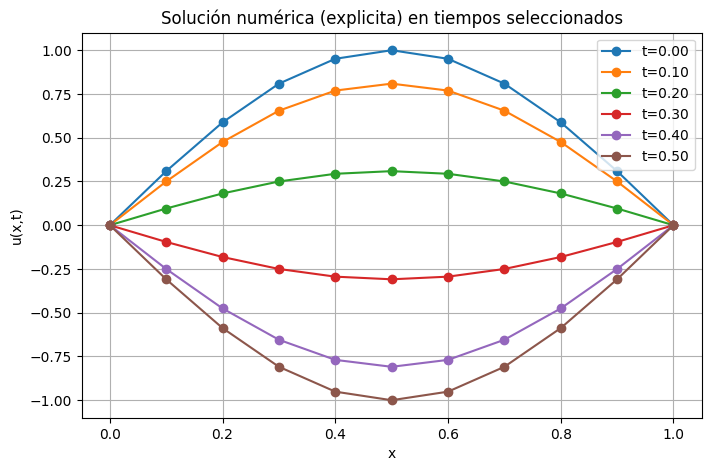

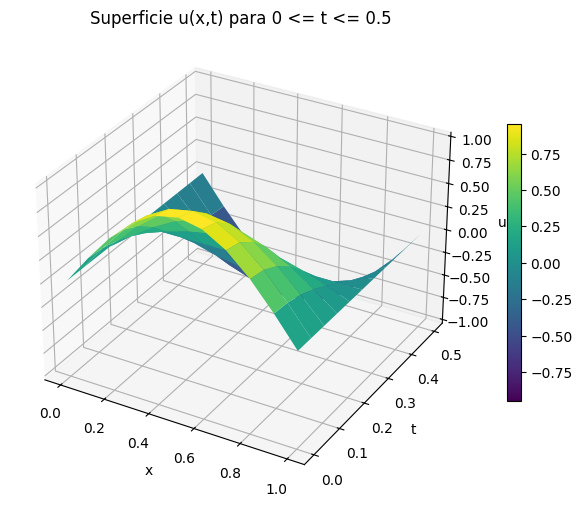


 Ejercicio 2:

Comparación con Tabla 12.6 (t=1.0):
 x    tabla     numerico    diff
 0.0  0.00000000  0.00000000   0.000e+00
 0.1  0.30901699  0.30901699   2.505e-11
 0.2  0.58778525  0.58778525   7.527e-12
 0.3  0.80901699  0.80901699   2.505e-11
 0.4  0.95105652  0.95105652   4.847e-12
 0.5  1.00000000  1.00000000   0.000e+00
 0.6  0.95105652  0.95105652   4.847e-12
 0.7  0.80901699  0.80901699   2.505e-11
 0.8  0.58778525  0.58778525   7.527e-12
 0.9  0.30901699  0.30901699   2.505e-11
 1.0  0.00000000  0.00000000   0.000e+00

Errores respecto a Tabla 12.6:
Max error = 2.5052571128725276e-11
L2 error  = 1.5582058791812475e-11


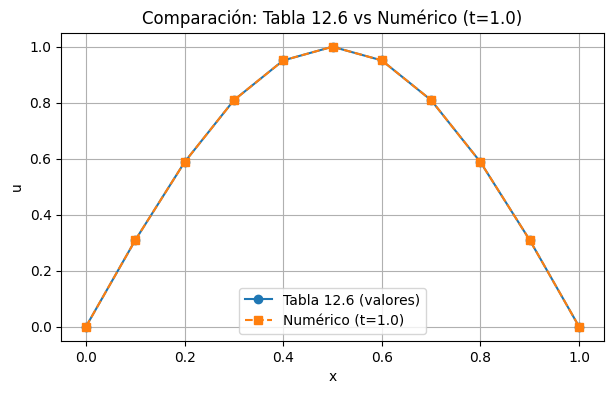


 Ejercicio 3:


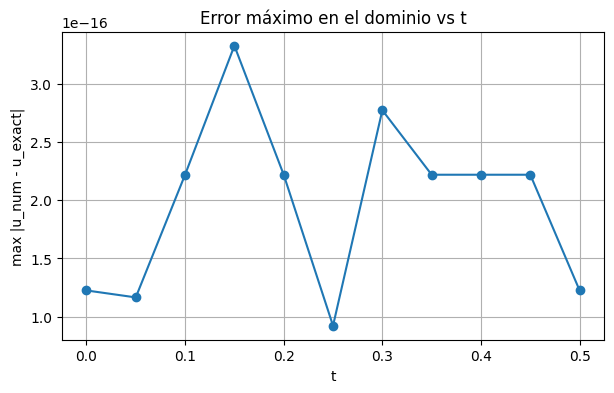


Comparación numérico vs exacto en t=0.5:
 0.0  exact=-0.00000000  num=0.00000000  diff=0.000e+00
 0.1  exact=-0.30901699  num=-0.30901699  diff=5.551e-17
 0.2  exact=-0.58778525  num=-0.58778525  diff=0.000e+00
 0.3  exact=-0.80901699  num=-0.80901699  diff=0.000e+00
 0.4  exact=-0.95105652  num=-0.95105652  diff=0.000e+00
 0.5  exact=-1.00000000  num=-1.00000000  diff=0.000e+00
 0.6  exact=-0.95105652  num=-0.95105652  diff=1.110e-16
 0.7  exact=-0.80901699  num=-0.80901699  diff=0.000e+00
 0.8  exact=-0.58778525  num=-0.58778525  diff=1.110e-16
 0.9  exact=-0.30901699  num=-0.30901699  diff=5.551e-17
 1.0  exact=-0.00000000  num=0.00000000  diff=1.225e-16

 Ejercicio 4:


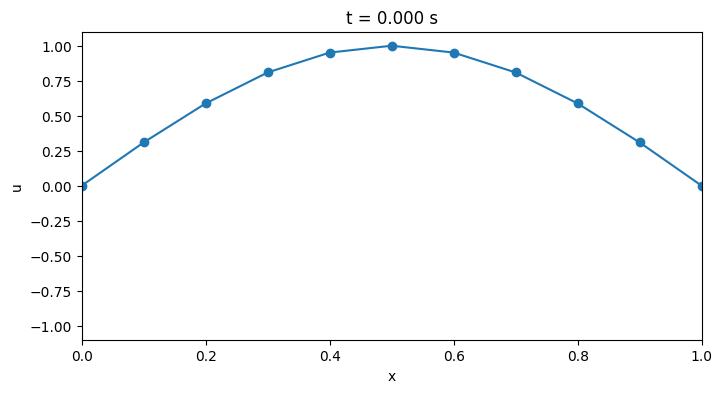

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Parámetros del problema
L = 1.0
h = 0.1
k = 0.05
alp = 2.0
lambda_ = (alp**2) * (k**2) / (h**2)
print("lambda =", lambda_)
if lambda_ > 1.0:
    print("CUIDADO: esquema inestable (lambda > 1)")

# Mallas
x = np.arange(0, L + 1e-12, h)
Nx = len(x)
Tfinal = 0.5
nt = int(np.round(Tfinal / k))

# Condiciones iniciales
def u0(x):
    return np.sin(np.pi * x)

def v0(x):
    return 0.0 * x

U = np.zeros((nt + 1, Nx))

U[0, :] = u0(x)

U[1, :] = U[0, :].copy()
# condiciones de frontera
for i in range(1, Nx - 1):
    U[1, i] = U[0, i] + k * v0(x[i]) + 0.5 * lambda_ * (U[0, i+1] - 2*U[0, i] + U[0, i-1])

U[:, 0] = 0.0
U[:, -1] = 0.0

# Iteración explícita central en tiempo
nsteps_total = int(np.round(1.0 / k))
for n in range(1, max(nt, nsteps_total)):
    if n+1 <= nt:
        dest = U
    else:

        pass


    if n+1 <= nt:
        for i in range(1, Nx-1):
            U[n+1, i] = 2*(1 - lambda_) * U[n, i] + lambda_*(U[n, i+1] + U[n, i-1]) - U[n-1, i]

        U[n+1, 0] = 0.0
        U[n+1, -1] = 0.0

# Ejercicio 1: gráficas 2D y 3D de la solución hasta t=0.5

# 2D: Curvas en distintos tiempos (0, 0.1, 0.2, 0.3, 0.4, 0.5)

print("\n Ejercicio 1:")

times = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
indices = [int(round(t / k)) for t in times]

plt.figure(figsize=(8,5))
for idx, t in zip(indices, times):
    plt.plot(x, U[idx,:], marker='o', label=f"t={t:.2f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solución numérica (explicita) en tiempos seleccionados")
plt.legend()
plt.grid(True)
plt.show()

# 3D: superficie (x,t,u)
Xg, Tg = np.meshgrid(x, np.arange(0, nt+1)*k)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xg, Tg, U[:nt+1,:], cmap=cm.viridis, edgecolor='none')
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
ax.set_title("Superficie u(x,t) para 0 <= t <= 0.5")
fig.colorbar(surf, shrink=0.6)
plt.show()

# Ejercicio 2: comparar con Tabla 12.6
print("\n Ejercicio 2:")

tabla_x = np.linspace(0,1,11)
tabla_vals = np.array([
    0.0,
    0.3090169944,
    0.5877852523,
    0.8090169944,
    0.9510565163,
    1.0,
    0.9510565163,
    0.8090169944,
    0.5877852523,
    0.3090169944,
    0.0
])

n_table = int(round(1.0 / k))
max_needed = n_table
if max_needed > nt:
    Ufull = np.zeros((max_needed+1, Nx))
    Ufull[0,:] = u0(x)
    Ufull[1,:] = Ufull[0,:].copy()
    for i in range(1, Nx-1):
        Ufull[1,i] = Ufull[0,i] + 0.5 * lambda_ * (Ufull[0,i+1] - 2*Ufull[0,i] + Ufull[0,i-1])
    Ufull[:,0] = 0; Ufull[:,-1] = 0
    for n in range(1, max_needed):
        for i in range(1, Nx-1):
            Ufull[n+1,i] = 2*(1-lambda_)*Ufull[n,i] + lambda_*(Ufull[n,i+1] + Ufull[n,i-1]) - Ufull[n-1,i]
        Ufull[n+1,0] = 0; Ufull[n+1,-1] = 0
    U_table = Ufull[n_table, :]
else:
    U_table = U[n_table, :]

# Mostrar comparacion con la tabla
print("\nComparación con Tabla 12.6 (t=1.0):")
print(" x    tabla     numerico    diff")
for xi, tval, unum in zip(tabla_x, tabla_vals, U_table):
    print(f"{xi:4.1f}  {tval:10.8f}  {unum:10.8f}  {abs(tval - unum):10.3e}")

# Errores
err_tab = np.abs(tabla_vals - U_table)
print("\nErrores respecto a Tabla 12.6:")
print("Max error =", err_tab.max())
print("L2 error  =", np.sqrt(np.sum(err_tab**2)/len(err_tab)))

# Gráfica comparación tabla vs numérico
plt.figure(figsize=(7,4))
plt.plot(tabla_x, tabla_vals, 'o-', label='Tabla 12.6 (valores)')
plt.plot(tabla_x, U_table, 's--', label='Numérico (t=1.0)')
plt.xlabel('x'); plt.ylabel('u'); plt.title('Comparación: Tabla 12.6 vs Numérico (t=1.0)')
plt.legend(); plt.grid(True); plt.show()

# Ejercicio 3: comparar numérico con solución exacta y errores
print("\n Ejercicio 3:")
def exact_solution(x, t):
    return np.sin(np.pi * x) * np.cos(2*np.pi * t)

# comparar en todos los tiempos hasta t=0.5
errors_time = []
times_list = np.arange(0, nt+1)*k
for n, t in enumerate(times_list):
    u_exact = exact_solution(x, t)
    err = np.abs(U[n,:] - u_exact)
    errors_time.append(np.max(err))

errors_time = np.array(errors_time)
# graficar error máximo vs tiempo
plt.figure(figsize=(7,4))
plt.plot(times_list, errors_time, marker='o')
plt.xlabel('t'); plt.ylabel('max |u_num - u_exact|'); plt.title('Error máximo en el dominio vs t')
plt.grid(True); plt.show()

# comparación en t = 0.5
n_05 = int(round(0.5 / k))
u_exact_05 = exact_solution(x, 0.5)
print("\nComparación numérico vs exacto en t=0.5:")
for xi, u_ex, u_num in zip(x, u_exact_05, U[n_05,:]):
    print(f"{xi:4.1f}  exact={u_ex:10.8f}  num={u_num:10.8f}  diff={abs(u_ex-u_num):8.3e}")

# Ejercicio 4: animación de la evolución temporal
print("\n Ejercicio 4:")
fig2, ax2 = plt.subplots(figsize=(8,4))
line, = ax2.plot(x, U[0,:], marker='o')
ax2.set_xlim(0,1)
ax2.set_ylim(1.1*U.min(), 1.1*U.max())
ax2.set_xlabel('x'); ax2.set_ylabel('u'); ax2.set_title('Evolución temporal (animación)')

def update(frame):
    line.set_ydata(U[frame,:])
    ax2.set_title(f"t = {frame*k:.3f} s")
    return (line,)

anim = FuncAnimation(fig2, update, frames=np.arange(0, nt+1), interval=150, blit=True)


save_mp4 = False
if save_mp4:
    writer = FFMpegWriter(fps=10)
    anim.save("onda_explicita.mp4", writer=writer)
    print("Animación guardada como onda_explicita.mp4")

plt.show()